# Harmonic Waves

## 7.1 Transverse sine and cosine waves

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5') # Needed for in-line movie

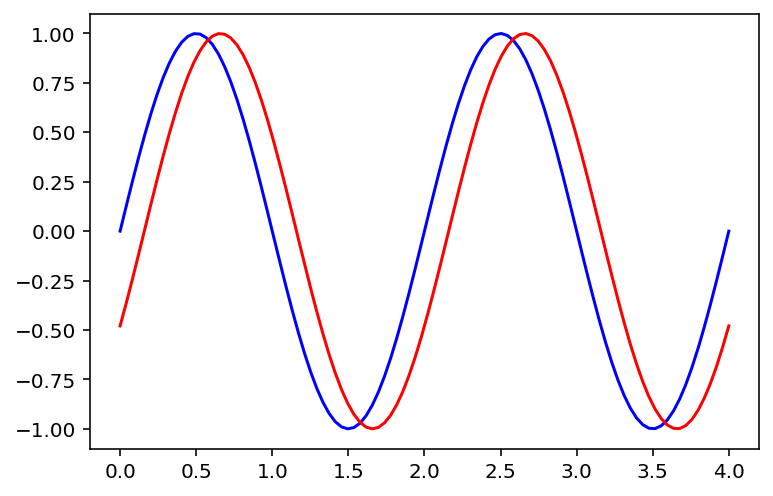

In [3]:
t = np.linspace(0,4,100)
omega_zero = np.pi
phase_shift = 1

def wave(time,shift):
    wave = np.sin(omega_zero*time - shift)
    return wave

plt.plot(t,wave(t,0),color='blue')
plt.plot(t,wave(t,0.5),color='red')
plt.show()

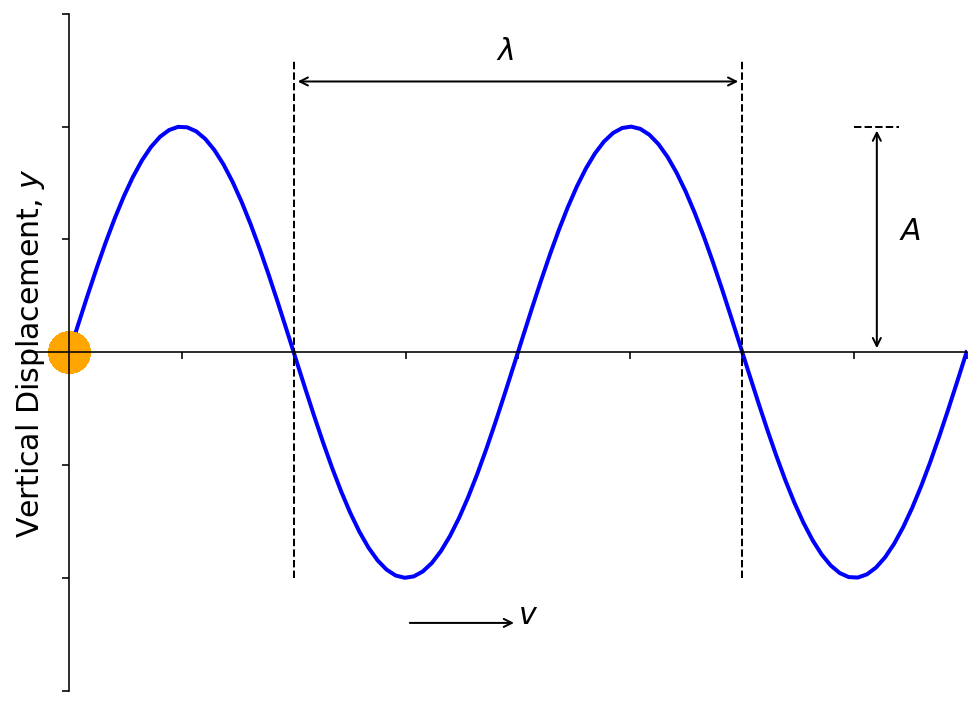

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlim=(-0.1,2),ylim=(-1.5,1.5))
size_of_font = 15


#x_lower = 48 # Index
#x_upper = 52 # Index
x_maximum = 2
#no_cycles = 1
T_period = 1 #s
omega = 2*np.pi/T_period
x = np.linspace(0,x_maximum,100)
t = np.linspace(0,T_period,30)
X2,T2 = np.meshgrid(x,t) # Creates a 2D grid of x and time

amplitude = 1
#f

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

pos_func = amplitude*np.sin((2*np.pi*X2 )-omega*T2)
ball_func = amplitude*np.sin(-omega*T2)

# Plot the first line
line_pos_full = ax.plot(x,pos_func[0,:], color='blue',lw=2,linestyle='-')[0]
ball_pos = ax.plot(0,pos_func[0,0],'o',markersize=20,color='orange')[0]

ax.plot([0.5,0.5],[-1,1.3],color='k',lw=1,linestyle='--')
ax.plot([1.5,1.5],[-1,1.3],color='k',lw=1,linestyle='--')
ax.plot([1.75,1.85],[1,1],color='k',lw=1,linestyle='--')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('',fontsize=size_of_font)

ax.annotate("", xy=(0.5, 1.2), xytext=(1.5, 1.2),arrowprops=dict(arrowstyle="<->"))
ax.annotate("$\lambda$",xy = (0.95,1.3),fontsize=15)

ax.annotate("", xy=(0.75, -1.2), xytext=(1, -1.2),arrowprops=dict(arrowstyle="<-"))
ax.annotate("$v$",xy = (1, -1.2),fontsize=15)

ax.annotate("", xy=(1.8, 1), xytext=(1.8, 0),arrowprops=dict(arrowstyle="<->"))
ax.annotate("$A$",xy = (1.85, 0.5),fontsize=15)


def animate(i):
    y_ball = amplitude*np.sin(-omega*T2[i])
    line_pos_full.set_ydata(pos_func[i,:])
    ball_pos.set_data(0,y_ball)
#    ball_pos.set_ydata(ball_func[:,i])
    
plt.tight_layout()
anim = animation.FuncAnimation(fig,animate,interval=100,frames=len(t)-1)
anim.save('ch6a-transversesine1.gif', writer='imagemagick', fps=15)
plt.savefig('ch6a-transversesine1.pdf',transparent=True)

plt.show()

anim

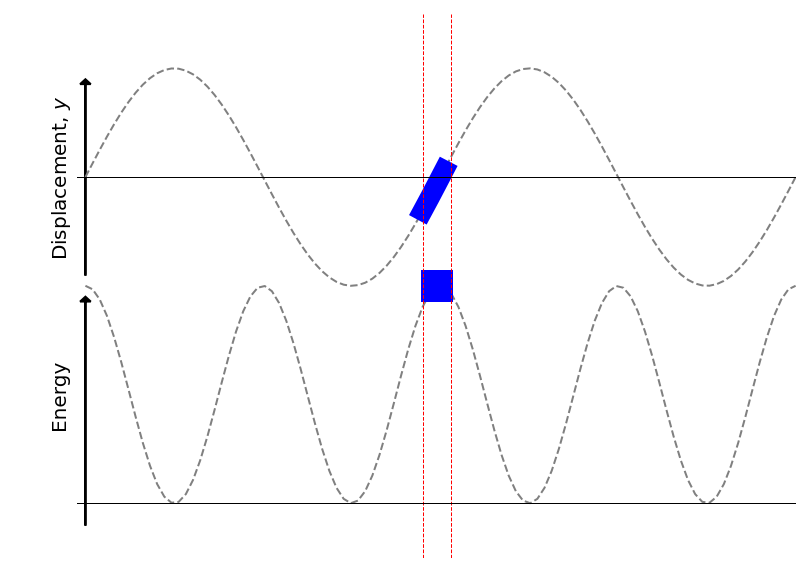

In [6]:
# Going to try this https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/


# Set up the plotting area

# Trying for a basic sine wave between 0 and 2
# 

fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlim=(-0.2,2),ylim=(-2.5,2.5))


x_lower = 47 # Index
x_upper = 51 # Index
x_maximum = 2
no_cycles = 1
T_period = 1 #s
omega = 2*np.pi/T_period
x = np.linspace(0,x_maximum,100)
t = np.linspace(0,T_period,120)
X2,T2 = np.meshgrid(x,t) # Creates a 2D grid of x and time
# This bit is needed to ensure that every time coordinate has the full 
# series of x coordinates associated. Important when x and t are in the same formula.

amplitude = 1

pos_func = amplitude*np.sin((2*np.pi*X2 )-omega*T2)+1
en_func = 2*amplitude*((np.cos((2*np.pi*X2 )-omega*T2))**2)-2
marker_func = amplitude*np.sin(-omega*T2)

# Plot the first line
line_pos_full = ax.plot(x,pos_func[0,:], color='gray',lw=1,linestyle='--')[0] # [0] returns first line of the "ax.plot" array
line_en_full  = ax.plot(x, en_func[0,:], color='gray',lw=1,linestyle='--')[0]
line_pos = ax.plot(x[x_lower:x_upper],pos_func[0,x_lower:x_upper],   color='blue',lw=10)[0] # [0] returns first line of the "ax.plot" array
marker_pos = ax.plot(x[49],en_func[0,0],'s',markersize=15,color='blue')[0]
#marker_pos2 = ax.plot([x[47],x[51]],[en_func[0,:],en_func[0,:]],linestyle='-',lw=3,color='red' )[0]
#ball_pos = ax.plot(0,pos_func[0,0],'o',markersize=20,color='orange')[0]



ax.axvline(x=x[x_lower],linewidth=0.5,color='r',linestyle="--")
ax.axvline(x=x[x_upper],linewidth=0.5,color='r',linestyle="--")

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.axis('off')

ax.axhline(xmin=0.08,y=1,linewidth=0.5,color='k',linestyle="-")
ax.axhline(xmin=0.08,y=-2,linewidth=0.5,color='k',linestyle="-")

plt.arrow(0,0.1,0,1.8, lw=1, length_includes_head=True, head_width=0.03, color='k')
ax.annotate("Displacement, $y$", xy=(-0.1, 1),fontsize=10, color='k',rotation=90,va='center')

plt.arrow(0,-2.2,0,2.1, lw=1, length_includes_head=True, head_width=0.03, color='k')
ax.annotate("Energy", xy=(-0.1, -1),fontsize=10, color='k',rotation=90,va='center')



#def init():
#    marker_pos.set_data([],[])

def animate(i):
    line_pos_full.set_ydata(pos_func[i,:])
    line_en_full.set_ydata(en_func[i,:])
    line_pos.set_ydata(pos_func[i,x_lower:x_upper])
    y_ball = 2*amplitude*(np.cos(-omega*T2[i]))**2 -2
    marker_pos.set_ydata(y_ball)

anim = animation.FuncAnimation(fig,animate,interval=20,frames=len(t)-1)
anim.save('ch6a-kepestringplot1.gif', writer='imagemagick', fps=15)
plt.savefig('ch6a-kepestringplot1.pdf',transparent=True)

plt.show()

anim

In [ ]:
y_ball

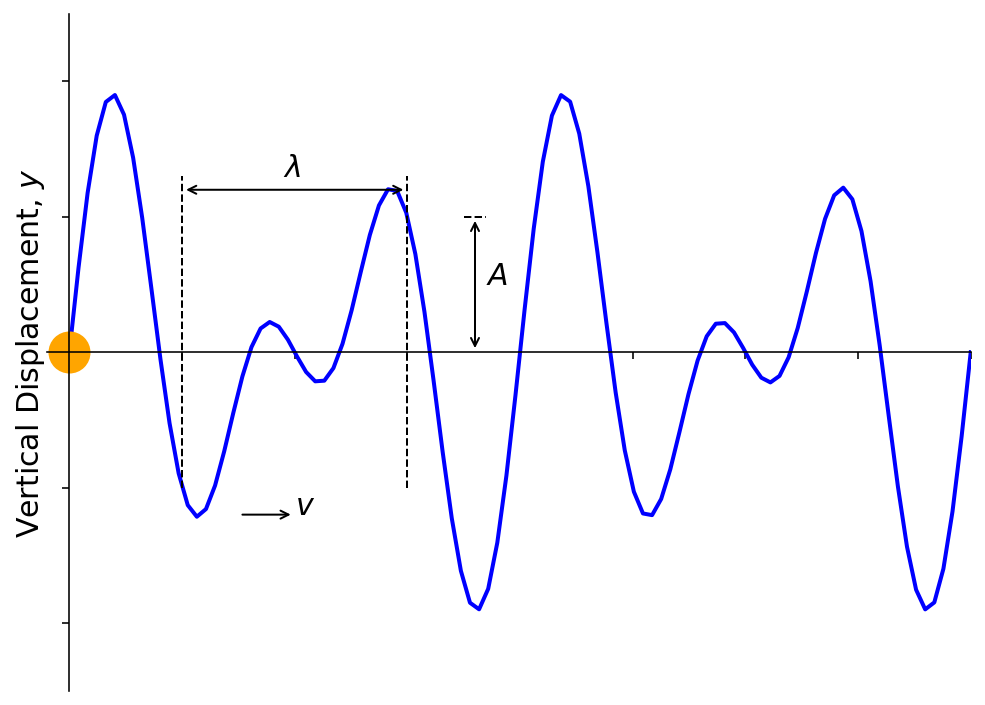

In [24]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlim=(-0.1,4),ylim=(-2.5,2.5))
size_of_font = 15


#x_lower = 48 # Index
#x_upper = 52 # Index
x_maximum = 4
#no_cycles = 1
T_period = 1 #s
omega = 2*np.pi/T_period
x = np.linspace(0,x_maximum,100)
t = np.linspace(0,T_period,30)
X2,T2 = np.meshgrid(x,t) # Creates a 2D grid of x and time

amplitude = 1
#f

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

pos_func = amplitude*(np.sin((2*np.pi*X2 )-omega*T2) + np.sin((3*np.pi*X2 )-omega*T2))
ball_func = amplitude*2*(np.sin(-omega*T2))

# Plot the first line
line_pos_full = ax.plot(x,pos_func[0,:], color='blue',lw=2,linestyle='-')[0]
ball_pos = ax.plot(0,pos_func[0,0],'o',markersize=20,color='orange')[0]

ax.plot([0.5,0.5],[-1,1.3],color='k',lw=1,linestyle='--')
ax.plot([1.5,1.5],[-1,1.3],color='k',lw=1,linestyle='--')
ax.plot([1.75,1.85],[1,1],color='k',lw=1,linestyle='--')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
ax.set_xlabel('',fontsize=size_of_font)

ax.annotate("", xy=(0.5, 1.2), xytext=(1.5, 1.2),arrowprops=dict(arrowstyle="<->"))
ax.annotate("$\lambda$",xy = (0.95,1.3),fontsize=15)

ax.annotate("", xy=(0.75, -1.2), xytext=(1, -1.2),arrowprops=dict(arrowstyle="<-"))
ax.annotate("$v$",xy = (1, -1.2),fontsize=15)

ax.annotate("", xy=(1.8, 1), xytext=(1.8, 0),arrowprops=dict(arrowstyle="<->"))
ax.annotate("$A$",xy = (1.85, 0.5),fontsize=15)


def animate(i):
    y_ball1 = amplitude*(np.sin((2*np.pi*0 )-omega*T2[i]) + np.sin((3*np.pi*0 )-omega*T2[i]))
    y_ball2 = amplitude*(np.sin((2*np.pi*0.5 )-omega*T2[i]) + np.sin((3*np.pi*0.5 )-omega*T2[i]))
    line_pos_full.set_ydata(pos_func[i,:])
    ball_pos.set_data(0,y_ball1)
    ball_pos.set_data(0.5,y_ball2)
#    ball_pos.set_ydata(ball_func[:,i])
    
plt.tight_layout()
anim = animation.FuncAnimation(fig,animate,interval=100,frames=len(t)-1)
#anim.save('ch6a-transversesine1.gif', writer='imagemagick', fps=15)
#plt.savefig('ch6a-transversesine1.pdf',transparent=True)

plt.show()

anim